# Tōkyō Daily Summer Temperatures

A time-series analysis of the maximum daily temperature in summer in Tōkyō since 1876.

In [1]:
 %matplotlib inline

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Import data

In [3]:
temps = pd.read_csv("tokyo_hot.tsv", sep = '\t')

In [4]:
temps.head(5)

,Year,Date,Max_Temp,ROW
0,1876,6/1/1876,17.0,1
1,1876,6/2/1876,19.1,1
2,1876,6/3/1876,17.9,1
3,1876,6/4/1876,18.8,1
4,1876,6/5/1876,19.1,1


## Transform data

In [54]:
temps.Date = pd.to_datetime(temps.Date)
temps.index = temps.Date

In [55]:
temps.dtypes

Year                 int64
Date        datetime64[ns]
Max_Temp           float64
ROW                  int64
Month                int64
dtype: object

In [8]:
temps.Date.max()

Timestamp('2018-07-17 00:00:00')

In [9]:
temps.head()

,Year,Date,Max_Temp,ROW,Month
Date,,,,,
1876-06-01,1876,1876-06-01,17.0,1,6
1876-06-02,1876,1876-06-02,19.1,1,6
1876-06-03,1876,1876-06-03,17.9,1,6
1876-06-04,1876,1876-06-04,18.8,1,6
1876-06-05,1876,1876-06-05,19.1,1,6


## Explore data

In [18]:
temps.describe()

,Year,Max_Temp,ROW,Month
count,17371.000000,17365.000000,17371.000000,17371.000000
mean,1946.693455,23.905045,71.693455,7.496920
std,41.104691,3.410202,41.104691,1.111063
min,1876.000000,11.100000,1.000000,6.000000
25%,1911.000000,21.400000,36.000000,7.000000
50%,1947.000000,24.200000,72.000000,7.000000
75%,1982.000000,26.600000,107.000000,8.000000
max,2018.000000,33.200000,143.000000,9.000000


### Increase in mean summer temps

Look at the mean over time.

In [10]:
temps_year = temps.groupby('Year')

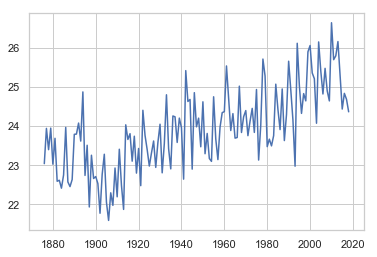

In [11]:
sns.lineplot(data = temps_year.Max_Temp.mean());

This shows a steady increase in mean temperature over the last century. Let's look at a smoothed version of the mean.

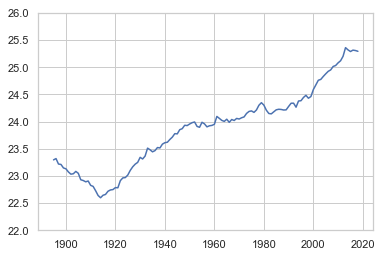

In [12]:
sns.lineplot(data = temps_year.Max_Temp.mean().rolling(20).mean())
plt.ylim([22, 26]);

Try a regression model to quantify the increase over 100 years up to 2017, and remove any NA values.

In [101]:
t_100y = temps[temps.Date >= pd.to_datetime('1917-06-01')].dropna().groupby('Year')

Timestamp('2017-06-01 00:00:00')

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
lr = LinearRegression()
lr_x = np.transpose(np.atleast_2d(t_100y.index.astype(int))) 
lr_y = t_100y

AttributeError: Cannot access attribute 'index' of 'SeriesGroupBy' objects, try using the 'apply' method

In [60]:
lr.fit(lr_x, lr_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
lr_y_pred = lr.predict(lr_x)
np.sqrt(mean_squared_error(lr_y, lr_y_pred))

3.3698914651192493

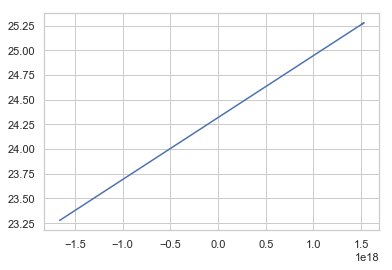

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(lr_x, lr_y_pred)

## Recent variations

Look at just the last ten years.

In [13]:
temps_10y = temps[temps.Date >= pd.to_datetime('2008-06-01')]

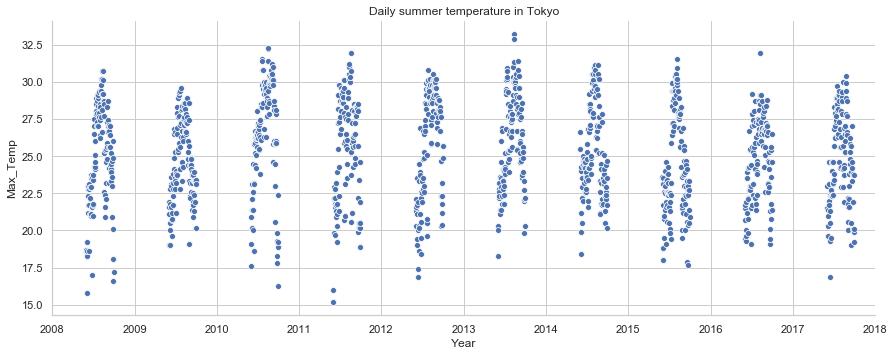

In [14]:
sns.relplot(x = "Date", y = "Max_Temp", data = temps_10y, aspect = 2.5)
plt.xlim(pd.to_datetime("2008"), pd.to_datetime("2018"))
plt.title("Daily summer temperature in Tokyo")
plt.xlabel("Year");

The data only contains summer temperatures between the dates 1st June and 30th September each year.

In [15]:
t_10y_grp = temps_10y.Max_Temp.groupby(temps_10y.Year)
t_10y_grp.mean()

Year
2008    24.897541
2009    24.641803
2010    26.638525
2011    25.695082
2012    25.793443
2013    26.158197
2014    25.288525
2015    24.433607
2016    24.834426
2017    24.682787
2018    24.363830
Name: Max_Temp, dtype: float64

Look at boxplots for each year.

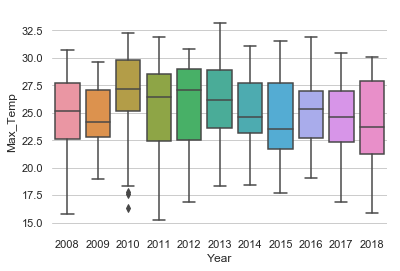

In [16]:
sns.boxplot(x = "Year", y = "Max_Temp", data = temps_10y)
sns.despine(left = True, bottom = True)

And by month...

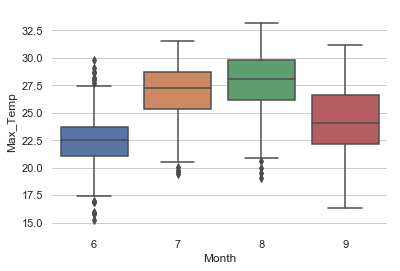

In [17]:
sns.boxplot(x = "Month", y = "Max_Temp", data = temps_10y)
sns.despine(left = True, bottom = True)

June is an interesting month. The interquartile range of temperatures is quite tight, but there are a lot of outliers in both directions.